**INSTALLING ALL DEPENDENCIES**

In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 54.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 75.4 MB/s eta 0:00:00:00:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.3:
      Successfully uninstalled tokenizers-0.20.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.3
    Uninstalling transformers-4.46.3:
      Successfully uninstalled transformers-4.46.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.3/336.3 kB 12.4 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.1.1
    Uninstalling accelerate-1.1.1:
      Successfully uninstalled accelerate-1.1.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 16.7 MB/s eta 0:00:00
  Attempting uninstall: datasets
    Found existing installation: dat

**IMPORTING ALL DEPENDENCIES**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from transformers import AutoModel
import torch
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments
from sklearn.metrics import accuracy_score, f1_score
from transformers import Trainer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [3]:
ds = load_dataset("dair-ai/emotion", "split")
ds.set_format(type='pandas')

README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [4]:
df=ds['train'][:]

In [5]:
ds['test'][:]

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0
...,...,...
1995,i just keep feeling like someone is being unki...,3
1996,im feeling a little cranky negative after this...,3
1997,i feel that i am useful to my people and that ...,1
1998,im feeling more comfortable with derby i feel ...,1


In [6]:
ds['validation'][:]

,text,label
0,im feeling quite sad and sorry for myself but ...,0
1,i feel like i am still looking at a blank canv...,0
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,3
4,i can have for a treat or if i am feeling festive,1
...,...,...
1995,im having ssa examination tomorrow in the morn...,0
1996,i constantly worry about their fight against n...,1
1997,i feel its important to share this info for th...,1
1998,i truly feel that if you are passionate enough...,1


In [7]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [8]:
ds['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [9]:
classes=ds['train'].features['label'].names

In [10]:
classes

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [11]:
df['newlabel']= df['label'].apply(lambda x : classes[x])

In [12]:
df.head()

,text,label,newlabel
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


**DATASET ANALYSIS WITH VISUALIZATIONS**

In [13]:
df['newlabel'].value_counts()

newlabel
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [14]:
print("Description of Data: ",df.describe())
print("_"*120)
print("Information of Data: ",df.info())
print("_"*120)
print("Checking null values  sumcount of Data: ", df.isnull().sum())
print("_"*120)
print("Label value count of Data: ",df['label'].value_counts())
print("_"*120)


Description of Data:                label
count  16000.000000
mean       1.565937
std        1.501430
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        5.000000
________________________________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      16000 non-null  object
 1   label     16000 non-null  int64 
 2   newlabel  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB
Information of Data:  None
________________________________________________________________________________________________________________________
Checking null values  sumcount of Data:  text        0
label       0
newlabel    0
dtype: int64
___________________________________________________________________________________

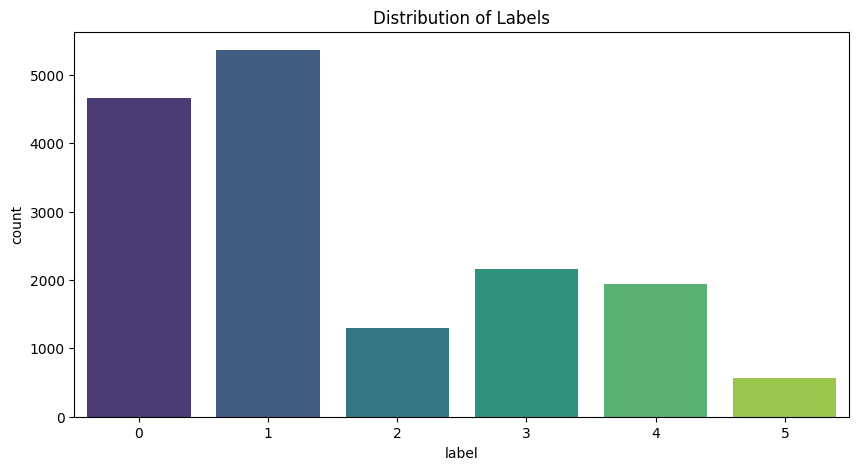

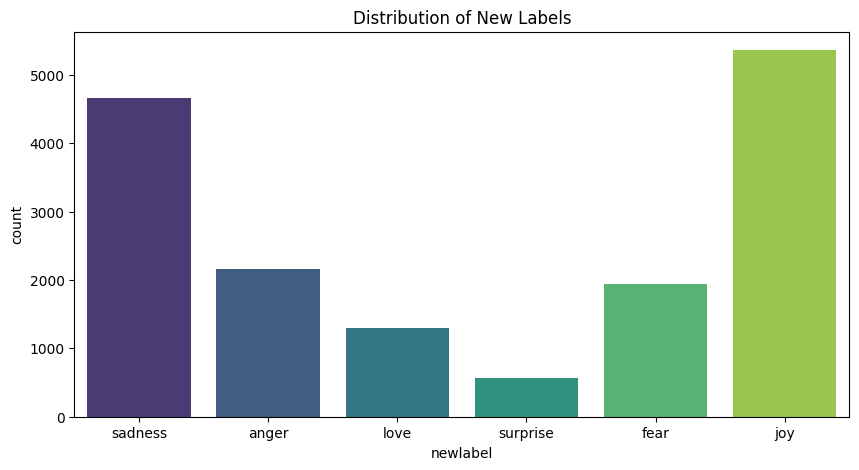

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='label', palette='viridis')
plt.title('Distribution of Labels')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='newlabel', palette='viridis')
plt.title('Distribution of New Labels')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


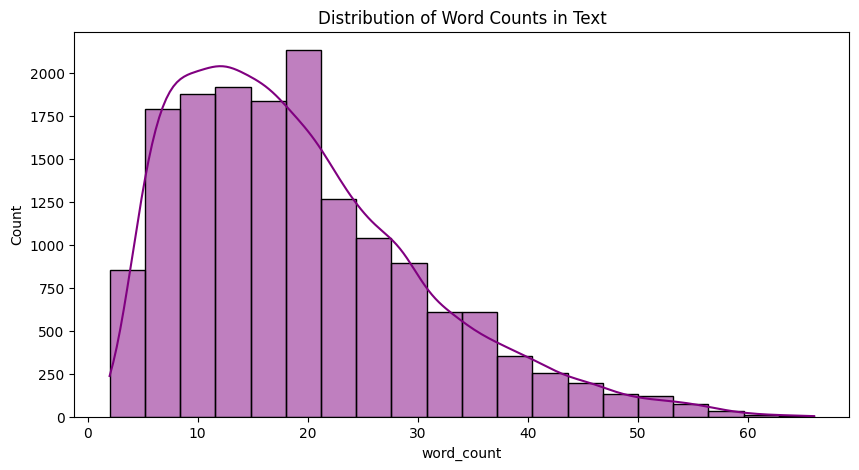

In [16]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], kde=True, bins=20, color='purple')
plt.title('Distribution of Word Counts in Text')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


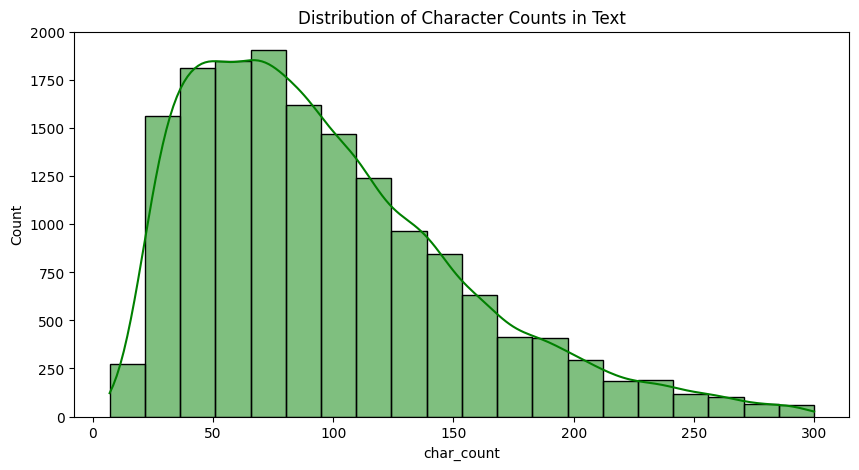

In [17]:
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['char_count'], kde=True, bins=20, color='green')
plt.title('Distribution of Character Counts in Text')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

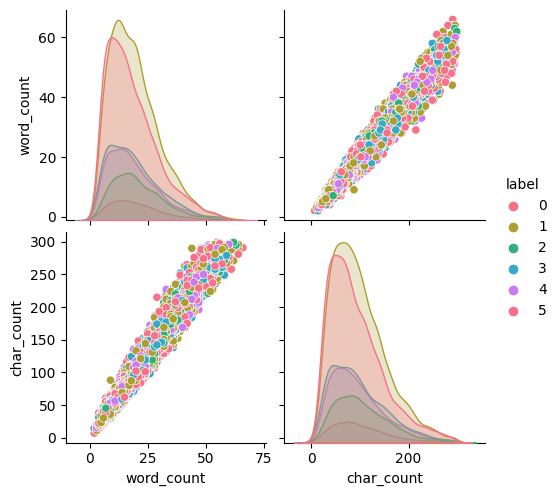

In [18]:
sns.pairplot(df[['word_count', 'char_count', 'label']], hue='label', palette='husl')
plt.show()

In [19]:
df.drop(columns=['word_count','char_count'],inplace=True)

In [20]:
# Get unique pairs of 'label' and 'newlabel'
unique_pairs = df[['label', 'newlabel']].drop_duplicates()

# Display the unique pairs
print(unique_pairs)

   label  newlabel
0      0   sadness
2      3     anger
3      2      love
6      5  surprise
7      4      fear
8      1       joy


In [21]:
df.head()

,text,label,newlabel
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


**PRETRAINED MODEL LOADING WITH TOKENIZERS**

In [22]:
# Load model directly
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

**ENCODING**

In [23]:
text="Nepal, a small yet diverse country located in South Asia, is known for its breathtaking landscapes and cultural heritage."
encoded_word = tokenizer(text)

In [24]:
encoded_word

{'input_ids': [101, 8222, 1010, 1037, 2235, 2664, 7578, 2406, 2284, 1999, 2148, 4021, 1010, 2003, 2124, 2005, 2049, 3052, 17904, 12793, 1998, 3451, 4348, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [25]:
tokens = tokenizer.convert_ids_to_tokens(encoded_word.input_ids)
print(tokens)

['[CLS]', 'nepal', ',', 'a', 'small', 'yet', 'diverse', 'country', 'located', 'in', 'south', 'asia', ',', 'is', 'known', 'for', 'its', 'breath', '##taking', 'landscapes', 'and', 'cultural', 'heritage', '.', '[SEP]']


In [26]:
ds.reset_format()

In [27]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [28]:
def tokenize(batch_data):
  tokenized_data =tokenizer(batch_data['text'], padding=True, truncation=True)
  return tokenized_data

print(tokenize(ds["train"][:5]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102], [101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2572, 2412, 3110, 16839, 9080, 12863, 2055, 1996, 13788, 1045, 2097, 2113, 2008, 2009, 2003, 2145, 2006, 1996, 3200, 102, 0], [101, 1045, 2572, 3110, 24665, 7140, 11714, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [29]:
emotions_encoded = ds.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [30]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [31]:
inputs = tokenizer(text, return_tensors='pt')
inputs

{'input_ids': tensor([[  101,  8222,  1010,  1037,  2235,  2664,  7578,  2406,  2284,  1999,
          2148,  4021,  1010,  2003,  2124,  2005,  2049,  3052, 17904, 12793,
          1998,  3451,  4348,  1012,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1]])}

In [32]:
model = AutoModel.from_pretrained("distilbert/distilbert-base-uncased")

with torch.no_grad():
  outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [33]:
last_hidden_states

tensor([[[-0.3059, -0.1283, -0.3624,  ..., -0.2410,  0.4227, -0.0053],
         [ 0.7899,  0.1538, -0.5382,  ..., -0.1931,  0.1279, -0.0844],
         [-0.7533,  0.0128, -0.3974,  ..., -0.4165,  0.1512, -0.2359],
         ...,
         [ 0.1849,  0.1164,  0.0151,  ..., -0.1964, -0.2324, -0.5381],
         [ 0.7501, -0.0502, -0.3648,  ...,  0.1962, -0.6372, -0.4919],
         [ 0.0951,  0.0933, -0.1550,  ...,  0.0421, -0.1701, -0.4793]]])

**GETTING AUTOMODEL SEQUENCE CLASSIFICATION**

In [34]:
num_labels = len(classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModelForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased", num_labels = num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**SETTING TRAINING ARGS**

In [47]:

batch_size = 64
model_name = "distilbert-finetuned-emotion_model"

training_args = TrainingArguments(output_dir = model_name,
                                 num_train_epochs=5,
                                  report_to="none",
                                 learning_rate = 2e-5,
                                 per_device_train_batch_size= batch_size,
                                 per_device_eval_batch_size = batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy = 'epoch',
                                  disable_tqdm=False)

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


**DEFINING METRICS**

In [48]:

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average='weighted')
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

**CREATING TRAINER**

In [49]:
trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded['train'],
                  eval_dataset=emotions_encoded['validation'],
                  tokenizer=tokenizer)

/tmp/ipykernel_23/3396887920.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, args=training_args,


In [50]:
# W&B_API_KEY= "PASTE YOUR API KEY HERE.."

**TRAINING STARTED !!**

In [51]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.163720,0.936500,0.937195
2,0.118200,0.159190,0.938000,0.938368
3,0.118200,0.159005,0.940500,0.940993
4,0.078800,0.156231,0.940000,0.940095
5,0.078800,0.161540,0.940000,0.939932


TrainOutput(global_step=1250, training_loss=0.08981556167602539, metrics={'train_runtime': 341.6282, 'train_samples_per_second': 234.173, 'train_steps_per_second': 3.659, 'total_flos': 1800857154240000.0, 'train_loss': 0.08981556167602539, 'epoch': 5.0})

In [52]:
preds_outputs = trainer.predict(emotions_encoded['test'])
preds_outputs.metrics

{'test_loss': 0.19393201172351837,
 'test_accuracy': 0.922,
 'test_f1': 0.9221952428625833,
 'test_runtime': 2.0982,
 'test_samples_per_second': 953.189,
 'test_steps_per_second': 15.251}

**CONFUSION MATRIX AND OTHER PREDICTI0NS**

In [53]:
y_preds = np.argmax(preds_outputs.predictions, axis=1)
y_true = emotions_encoded['test'][:]['label']

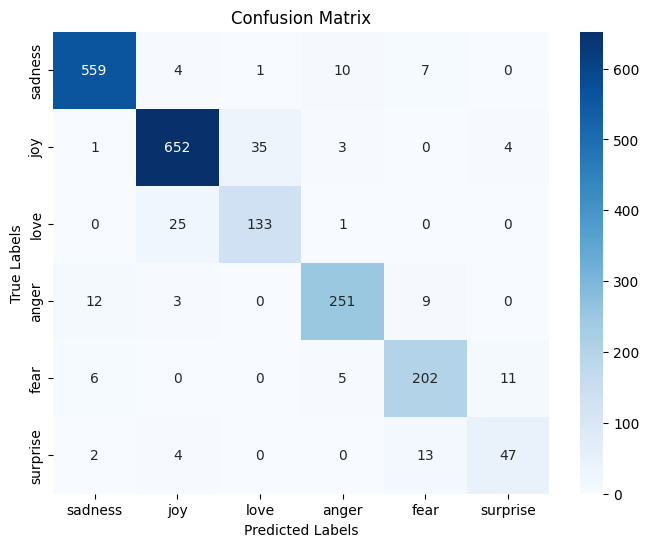

In [54]:

# Assume `y_true` and `y_preds` are defined
# `classes` is the list of class names
cm = confusion_matrix(y_true, y_preds)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
    # label  newlabel

    #   0   sadness
    #   3     anger
    #   2      love
    #   5  surprise
    #   4      fear
    #   1       joy

**FINDING BEST CHECKPOINTS MDOEL OUT OF 3.**

In [63]:

# Define paths to checkpoints
checkpoints = [
    "/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-500",
    "/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-1000",
    "/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-1250"
]

# Validation dataset (example: text and labels)
validation_texts = [
    "I feel so happy today!",
    "This is so frustrating.",
    "I'm just feeling okay.",
    "Wow, what an amazing day, but I'm so exhausted!"
]
validation_labels = [2, 3, 1, 2]  # Replace with your actual label indices

# Evaluate each checkpoint
results = {}
for checkpoint in checkpoints:
    # Load model and tokenizer
    tokenizer = DistilBertTokenizer.from_pretrained(checkpoint)
    model = DistilBertForSequenceClassification.from_pretrained(checkpoint)
    model.eval()

    # Prepare data
    inputs = tokenizer(validation_texts, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Get predictions
    predictions = torch.argmax(outputs.logits, dim=-1).tolist()
    accuracy = accuracy_score(validation_labels, predictions)

    # Store results
    results[checkpoint] = accuracy

# Find best checkpoint
best_checkpoint = max(results, key=results.get)
print("Validation Results:", results)
print("Best Checkpoint:", best_checkpoint)


Validation Results: {'/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-500': 0.25, '/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-1000': 0.5, '/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-1250': 0.5}
Best Checkpoint: /kaggle/working/distilbert-finetuned-emotion_model/checkpoint-1000


**INFERENCING FINE TUNED MODEL**

In [65]:
import shutil

# Source directory
source_dir = '/kaggle/working/distilbert-finetuned-emotion_model'

# Output zip file
output_zip = '/kaggle/working/distilbert-finetuned-emotion_model.zip'

# Create a zip file
shutil.make_archive(base_name=output_zip.replace('.zip', ''), format='zip', root_dir=source_dir)

print(f"Zipped directory is saved at {output_zip}")

Zipped directory is saved at /kaggle/working/distilbert-finetuned-emotion_model.zip


**NOW, TESTING ON REAL TEXT**

In [64]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Path to the saved model and tokenizer
model_path = "/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-1000"

# Load tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained(model_path)
model = DistilBertForSequenceClassification.from_pretrained(model_path)

# Ensure the model is in evaluation mode
model.eval()

texts = [
    "I am happy but also a bit nervous about tomorrow.",
    "This is the worst thing ever, but I guess it could have been worse.",
    "I feel okay, not great, but not terrible either.",
    "Wow, what an amazing day, but I'm so exhausted!",
    "I'm furious but also strangely relieved that it's over."
]

# Tokenize the input text
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=512)

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Get the logits (raw model outputs)
logits = outputs.logits

# Convert logits to probabilities (softmax)
probabilities = torch.nn.functional.softmax(logits, dim=-1)

# Get predicted class labels
predicted_classes = torch.argmax(probabilities, dim=-1)

# Print results
for text, probs, label in zip(texts, probabilities, predicted_classes):
    print(f"Text: {text}")
    print(f"Predicted Emotion Label: {label.item()}")
    print(f"Probabilities: {probs.numpy()}\n")


Text: I am happy but also a bit nervous about tomorrow.
Predicted Emotion Label: 4
Probabilities: [3.6999452e-04 2.9573403e-04 9.5922653e-05 6.3087582e-04 9.9817252e-01
 4.3492584e-04]

Text: This is the worst thing ever, but I guess it could have been worse.
Predicted Emotion Label: 0
Probabilities: [9.2259341e-01 1.4310871e-02 8.7111915e-04 3.8959268e-02 2.2119151e-02
 1.1461593e-03]

Text: I feel okay, not great, but not terrible either.
Predicted Emotion Label: 1
Probabilities: [2.7252705e-04 9.9919885e-01 1.7719778e-04 5.8678837e-05 7.5500051e-05
 2.1708760e-04]

Text: Wow, what an amazing day, but I'm so exhausted!
Predicted Emotion Label: 0
Probabilities: [9.9840623e-01 5.5985909e-04 6.6735323e-05 3.6005661e-04 3.9953520e-04
 2.0755237e-04]

Text: I'm furious but also strangely relieved that it's over.
Predicted Emotion Label: 1
Probabilities: [2.2056430e-04 9.9559206e-01 3.0443503e-03 3.5398130e-04 1.7402439e-04
 6.1496982e-04]



In [66]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Path to the saved model and tokenizer
model_path = "/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-1000"

# Load tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained(model_path)
model = DistilBertForSequenceClassification.from_pretrained(model_path)

# Ensure the model is in evaluation mode
model.eval()

# Your input texts
texts = [
    "I am happy but also a bit nervous about tomorrow.",
    "This is the worst thing ever, but I guess it could have been worse.",
    "I feel okay, not great, but not terrible either.",
    "Wow, what an amazing day, but I'm so exhausted!",
    "I'm furious but also strangely relieved that it's over."
]

# Mapping of class indices to labels
label_map = {
    0: "sadness",
    3: "anger",
    2: "love",
    5: "surprise",
    4: "fear",
    1: "joy"
}

# Tokenize the input text
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=512)

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Get the logits (raw model outputs)
logits = outputs.logits

# Convert logits to probabilities (softmax)
probabilities = torch.nn.functional.softmax(logits, dim=-1)

# Get top 3 predicted class labels for each text
top_k = 3  # Top 3 classes
top_probs, top_labels = torch.topk(probabilities, top_k, dim=-1)

# Print results for each text
for text, probs, labels in zip(texts, top_probs, top_labels):
    print(f"Text: {text}")
    print("Top 3 Predicted Emotions with Probabilities:")
    for prob, label in zip(probs, labels):
        print(f"  {label_map[label.item()]}: {prob.item():.4f}")
    print("\n")


Text: I am happy but also a bit nervous about tomorrow.
Top 3 Predicted Emotions with Probabilities:
  fear: 0.9982
  anger: 0.0006
  surprise: 0.0004


Text: This is the worst thing ever, but I guess it could have been worse.
Top 3 Predicted Emotions with Probabilities:
  sadness: 0.9226
  anger: 0.0390
  fear: 0.0221


Text: I feel okay, not great, but not terrible either.
Top 3 Predicted Emotions with Probabilities:
  joy: 0.9992
  sadness: 0.0003
  surprise: 0.0002


Text: Wow, what an amazing day, but I'm so exhausted!
Top 3 Predicted Emotions with Probabilities:
  sadness: 0.9984
  joy: 0.0006
  fear: 0.0004


Text: I'm furious but also strangely relieved that it's over.
Top 3 Predicted Emotions with Probabilities:
  joy: 0.9956
  love: 0.0030
  surprise: 0.0006


